In [ ]:
!pip install tensorflow keras-ocr matplotlib opencv-python pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import pandas as pd

# DATA PREPROCESSING

In [ ]:
# Load the CSV file
csv_path = "plate_numbers.csv"
annotations = pd.read_csv(csv_path)
y_num_rows = len(annotations.iloc[:, -1])
print(f"The number of rows in the y dataset is {y_num_rows}\n\n\n")
# The first few rows
print(annotations.head())

The number of rows in the y dataset is 100



                                 image_path      label
0  /content/drive/MyDrive/Plates/img_1.jpeg  FKJ-254XA
1  /content/drive/MyDrive/Plates/img_2.jpeg  APP-456CV
2  /content/drive/MyDrive/Plates/img_3.jpeg  SE249-KJA
3  /content/drive/MyDrive/Plates/img_4.jpeg  YLA-291EL
4  /content/drive/MyDrive/Plates/img_5.jpeg  KJA-193AA


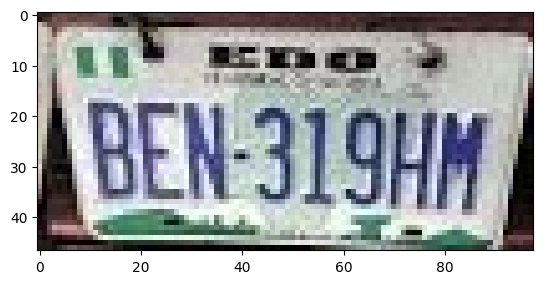

In [ ]:
# Python program to read
# image using matplotlib

# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
# Read random images

number = random.randint(1, 100)
img = mpimg.imread(f'/content/drive/MyDrive/Plates/img_{number}.jpeg')
plt.imshow(img)

#CREATING THE DATASET - GRAYSCALE

In [ ]:
import cv2
import numpy as np
import pandas as pd
import os

def create_dataset(image_folder, csv_path, target_size=(128, 64)):
    """
    Create a dataset of preprocessed images and labels.

    Args:
        image_folder (str): Path to the folder containing the images.
        csv_path (str): Path to the CSV file containing image paths and labels.
        target_size (tuple): Target size for resizing images (height, width).

    Returns:
        X (np.array): Matrix of preprocessed images.
        y (np.array): Array of labels.
    """
    # Load the CSV file
    annotations = pd.read_csv(csv_path)

    # Initialize lists to store images and labels
    X = []  # List to store preprocessed images
    y = []  # List to store labels

    # Loop through each row in the CSV file
    for index, row in annotations.iterrows():
        # Construct the full image path
        image_path = os.path.join(image_folder, row['image_path'])

        # Preprocess the image
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Warning: Could not read image {image_path}. Skipping.")
            continue
        # Resize the image
        image = cv2.resize(image, target_size)
        # Normalize pixel values to [0, 1]
        image = image.astype('float32') / 255.0
        # Add a channel dimension (required for CNN models)
        image = np.expand_dims(image, axis=-1)

        # Append the preprocessed image and label to the lists
        X.append(image)
        y.append(row['label'])

    # Converting lists to NumPy arrays
    X = np.array(X)
    y = np.array(y)
    # Reshapeing X
    X = X.reshape(-1, 128, 64, 3)

    return X, y

    return X, y

In [ ]:
# DATASET PATH
image_folder = '/content/drive/MyDrive/Plates'
csv_path = 'plate_numbers.csv'

# CREATION OF DATASET
X, y = create_dataset(image_folder, csv_path)

# Check the shapes of the dataset
print("Images shape:", X.shape)
print("Labels shape:", y.shape)

Images shape: (100, 64, 128, 1)
Labels shape: (100,)


In [ ]:
print(f"The first license plate number is {y[0]}")
print(f"The last license plate number is {y[-1]}")

The first license plate number is FKJ-254XA
The last license plate number is TKP-973


#CREATING THE DATASET - RGB

In [ ]:
import cv2
import numpy as np
import pandas as pd
import os

def create_dataset(image_folder, csv_path, target_size=(128, 64)):
    """
    Create a dataset of preprocessed images and labels.

    Args:
        image_folder (str): Path to the folder containing the images.
        csv_path (str): Path to the CSV file containing image paths and labels.
        target_size (tuple): Target size for resizing images (height, width).

    Returns:
        X (np.array): Matrix of preprocessed images.
        y (np.array): Array of labels.
    """
    # Loading the y csv
    annotations = pd.read_csv(csv_path)
    X = []
    y = []

    # Loop through each row in the CSV file
    for index, row in annotations.iterrows():
        # Constructing the full image path
        image_path = os.path.join(image_folder, row['image_path'])

        # Reading the image in BGR format (default)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Could not read image {image_path}. Skipping.")
            continue

        # Converting BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Resizeing the image
        image = cv2.resize(image, target_size)

        # Normalizing pixel values to [0, 1]
        image = image.astype('float32') / 255.0

        # Appending the preprocessed image and label to the lists
        X.append(image)
        y.append(row['label'])

    # Converting lists to NumPy arrays
    X = np.array(X)
    y = np.array(y)
    # Reshapeing X
    X = X.reshape(-1, 128, 64, 3)

    return X, y

In [ ]:
# DATASET PATH
image_folder = '/content/drive/MyDrive/Plates'
csv_path = 'plate_numbers.csv'

# CREATION OF DATASET
X, y = create_dataset(image_folder, csv_path)

# Check the shapes of the dataset
print("Images shape:", X.shape)
print("Labels shape:", y.shape)

Images shape: (100, 128, 64, 3)
Labels shape: (100,)


In [ ]:
print(f"The first license plate number is {y[0]}")
print(f"The last license plate number is {y[-1]}")

The first license plate number is FKJ-254XA
The last license plate number is TKP-973


#Y label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Flatten the labels into a list of characters
characters = [char for label in y for char in label]

# Fit a LabelEncoder on the characters
label_encoder = LabelEncoder()
label_encoder.fit(characters)

# Encode the labels
y_encoded = [label_encoder.transform(list(label)) for label in y]

# Pad the encoded labels to the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

y_padded = pad_sequences(y_encoded, padding='post')

# Check the shapes
print("Encoded labels shape:", y_padded.shape)
print(f"First label is {y_padded[0]}")
print(f"Last label is {y_padded[0]}")

Encoded labels shape: (100, 9)
First label is [17 22 21  1  4  7  6 35 12]
Last label is [17 22 21  1  4  7  6 35 12]


# MODEL BUILD

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y_padded, test_size=0.2, random_state=1)
print(f"X_train shape is: {X_train.shape}")
print(f"y_train shape is: {y_train.shape}")
print(f"X_val shape is: {X_val.shape}")
print(f"y_val shape is: {y_val.shape}")

X_train shape is: (80, 128, 64, 3)
y_train shape is: (80, 9)
X_val shape is: (20, 128, 64, 3)
y_val shape is: (20, 9)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import Sequence
from tensorflow.keras.backend import ctc_batch_cost

# ================================
# 1️⃣  Define Constants
# ================================
img_width, img_height, channels = 128, 64, 3  # Image dimensions
max_label_length = 9  # Max license plate length

# Character set: 26 letters + 10 digits
char_list = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
char_to_index = {char: i for i, char in enumerate(char_list)}
index_to_char = {i: char for i, char in enumerate(char_list)}
num_classes = len(char_list) + 1  # Extra class for CTC blank token

# ================================
# 2️⃣  Label Encoding Functions
# ================================
def encode_label(label):
    """Convert license plate string to integer sequence, ignoring unknown characters"""
    label = str(label)  # Ensure it's a string
    return [char_to_index[c] for c in label if c in char_to_index]  # Ignore unknown chars


def decode_label(seq):
    """Convert integer sequence back to text"""
    return "".join([index_to_char[i] for i in seq if i in index_to_char])

# ================================
# 3️⃣  Data Generator
# ================================
class LicensePlateGenerator(Sequence):
    def __init__(self, X, y, batch_size=16):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.indices = np.arange(len(X))

    def __len__(self):
        return len(self.X) // self.batch_size

    def __getitem__(self, idx):
        batch_indices = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_X = np.array([self.X[i] for i in batch_indices])
        batch_y_text = [self.y[i] for i in batch_indices]

        batch_y_encoded = np.array([encode_label(y) for y in batch_y_text])
        batch_input_length = np.ones((self.batch_size, 1)) * 32  # CNN output time steps
        batch_label_length = np.array([[len(y)] for y in batch_y_text])

        inputs = {
            'image_input': batch_X,
            'label_input': batch_y_encoded,
            'input_length': batch_input_length,
            'label_length': batch_label_length
        }
        outputs = np.zeros((self.batch_size, 1))  # Dummy output for CTC loss

        return inputs, outputs

# ================================
# 4️⃣  Build CRNN Model with CTC Loss
# ================================
def build_crnn_model():
    # Input layer
    input_img = Input(shape=(img_width, img_height, channels), name='image_input')

    # CNN Feature Extractor
    x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)

    # Reshape for LSTM
    x = Reshape(target_shape=(8, 16 * 128))(x)  # ✅ Correct shape|| Flatten feature maps

    # LSTM Sequence Model
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Dense(num_classes, activation='softmax')(x)  # 36 characters + blank

    # CTC Loss
    labels = Input(shape=(max_label_length,), name='label_input')
    input_length = Input(shape=(1,), dtype='int64', name='input_length')
    label_length = Input(shape=(1,), dtype='int64', name='label_length')

    def ctc_lambda_func(args):
        y_pred, labels, input_length, label_length = args
        return ctc_batch_cost(labels, y_pred, input_length, label_length)

    ctc_loss = tf.keras.layers.Lambda(ctc_lambda_func, output_shape=(1,), name='ctc_loss')([x, labels, input_length, label_length])

    # Define Model
    model = Model(inputs=[input_img, labels, input_length, label_length], outputs=ctc_loss)

    # Compile Model
    model.compile(optimizer='adam')

    return model

# ================================
# 5️⃣  Load Data & Create Generators
# ================================
# Assume X_train, X_val, y_train, y_val are pre-loaded numpy arrays
batch_size = 16
train_gen = LicensePlateGenerator(X_train, y_train, batch_size=batch_size)
val_gen = LicensePlateGenerator(X_val, y_val, batch_size=batch_size)

# ================================
# 6️⃣  Train the Model
# ================================
model = build_crnn_model()
model.fit(train_gen, validation_data=val_gen, epochs=20, verbose=1)

# ================================
# 7️⃣  Predict and Decode
# ================================
def decode_prediction(pred):
    pred_text = []
    for row in pred:
        decoded = [index_to_char[np.argmax(c)] for c in row if np.max(c) > 0.5]
        pred_text.append("".join(decoded))
    return pred_text

# Example prediction
sample_img = np.expand_dims(X_val[0], axis=0)  # Take one sample
preds = model.predict(sample_img)
decoded_text = decode_prediction(preds)
print("Predicted License Plate:", decoded_text)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (16,) + inhomogeneous part.

Epoch 1/20


IndexError: tuple index out of range